In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Radar config (from textfile)
rx = 4
n = 512
chirp = 192
IQ = 2

In [3]:
def test_step(fn, data):
    start = time.time()
    out = fn(data)
    end = time.time()

    print("Execution time: {:5f}".format(end - start))
    print("Output shape: {}".format(str(out.shape)))

    return out

In [4]:
def radarcube(adc):
    cube_ = adc.reshape(chirp, n, IQ, rx, order='C')
    cube_ = np.moveaxis(cube_, [0,1,2,3], [2,3,0,1])
    # cube_ = np.moveaxis(cube_, [0,1,2,3,4], [1,3,4,0,2])
    cube = cube_[0] + 1j * cube_[1]
    return cube

In [5]:
def rangedoppler(cube):
    rdm = np.fft.fft2(cube, axes=(0,1))
    rdm = np.fft.fftshift(rdm, axes=(0,1))
    return rdm

In [6]:
def visualize(rdm):
    plt.imshow(np.abs(rdm.T), aspect='auto', vmin=0, vmax=100000000)
    plt.show()
    return rdm

In [7]:
# Load IQ data from disk
path = '/tmp/data/adc_data1.txt'
adc_data = np.fromfile(path, sep='\n')

# Create radar cube
newcube = test_step(radarcube, adc_data)

Execution time: 0.004255
Output shape: (4, 192, 512)


In [10]:
# Select TX / RX
frame = newcube[0]

In [11]:
# Calculate 2D FFt
newrdm = test_step(rangedoppler, frame)

Execution time: 0.004376
Output shape: (192, 512)


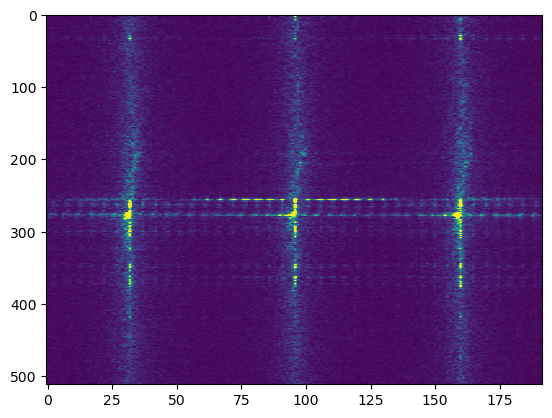

Execution time: 0.180030
Output shape: (192, 512)


In [12]:
test_step(visualize, newrdm);